<a href="https://colab.research.google.com/github/subhashpolisetti/Clustering-Techniques-and-Embeddings/blob/main/2_Hierarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering Algorithms: K-Means, DBSCAN, and Hierarchical Clustering

This notebook demonstrates the application of K-Means, DBSCAN, and Hierarchical Clustering algorithms on various datasets, including synthetic, image, and real-world data. The key topics covered include:
- **K-Means**: Applied to a synthetic blob dataset, non-convex clusters, and handwritten digit data.
- **DBSCAN**: Used to handle non-convex clusters and adjust clustering based on density.
- **Hierarchical Clustering**: Applied to the Iris dataset with visualizations of dendrograms and heatmaps.

Additionally, the notebook includes exercises that apply clustering to real-world problems, such as plant species clustering and DNA binding site clustering.

### Datasets:
- Synthetic data (make_blobs, make_moons)
- Handwritten digits dataset
- Iris dataset
- DNA binding sites dataset


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs
X,y = make_blobs(centers=4, n_samples=200, random_state=0, cluster_std=0.7)
print(X[:10],y[:10])

[[ 2.26403424  1.82613379]
 [-0.97647444  2.59138889]
 [ 1.10046838  4.02254067]
 [-2.82715074  7.11970523]
 [ 1.53393915  0.31915668]
 [ 0.98362009  5.55389667]
 [-1.74452433  2.98606238]
 [ 0.35482006  2.9172298 ]
 [ 1.83747356  5.14545322]
 [ 1.48663347  4.39407536]] [1 2 0 3 1 0 2 0 0 0]


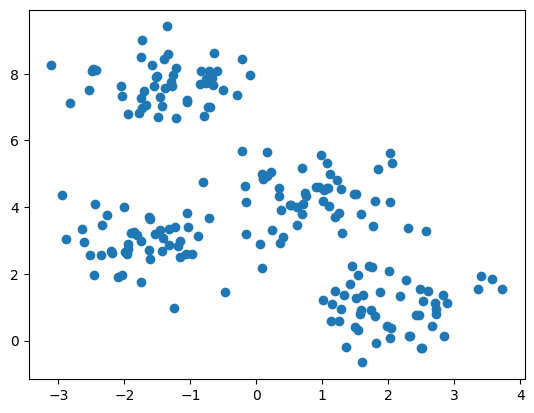

In [3]:
plt.scatter(X[:,0],X[:,1]);

We can still distinguish four clusters in the dataset. Let's see if the K-Means algorithm can identify these clusters. First, we create an instance of the K-Means model, specifying 4 as the number of clusters (a hyperparameter).

In [4]:
from sklearn.cluster import KMeans
model = KMeans(4)
model.fit(X)
print(model.cluster_centers_)

[[-1.64019917  2.91564301]
 [-1.36512238  7.70188306]
 [ 2.07464749  0.9869902 ]
 [ 0.8965512   4.36602968]]


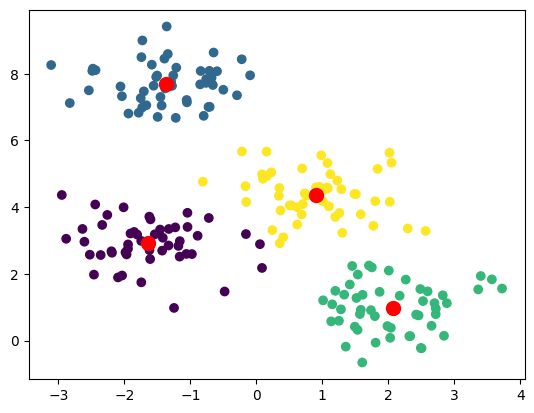

In [5]:
plt.scatter(X[:,0],X[:,1], c=model.labels_);
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=100, color="red"); # Show the centres

The clustering looks more or less correct. To get a more quantitative measure of success we can get the accuracy score.

In [6]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y, model.labels_)
print("Accuracy score is", acc)

Accuracy score is 0.0


Oops! Even though the clusters could match almost perfectly to the original, their labels might be permuted. Let's select randomly one point from each cluster and check their labels from the original data labels. Then we use this label for the whole cluster. In essence, we are renaming the clusters, not re-clustering the data.

In [7]:
import scipy.stats

def find_permutation(n_clusters, real_labels, labels):
    permutation = []
    for i in range(n_clusters):
        idx = labels == i
        mode_result = scipy.stats.mode(real_labels[idx])
        new_label = mode_result.mode  # Access the mode directly
        permutation.append(new_label)
    return permutation

In [8]:
permutation = find_permutation(4, y, model.labels_)
print(permutation)

[2, 3, 1, 0]


In [9]:
new_labels = [ permutation[label] for label in model.labels_]   # permute the labels
print("Accuracy score is", accuracy_score(y, new_labels))

Accuracy score is 1.0


So, the k-means algorithm seems to work well in this case, but there can be several problems. Firstly, even though an EM algorithm always converges, it might converge to a local maximum. To avoid this, EM type algorithms are usually run several times, each time starting from different random initial values. For instance, in the scikit-learn implementation, the algorithms is restarted by default 10 times.

#More complicated example
The k-means algorithm can have difficulties when the clusters are not convex shapes:

In [10]:
from sklearn.datasets import make_moons
X,y = make_moons(200, noise=0.05, random_state=0)

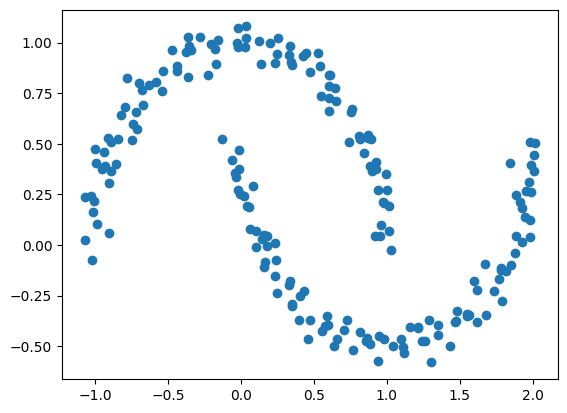

In [11]:
plt.scatter(X[:,0], X[:,1]);

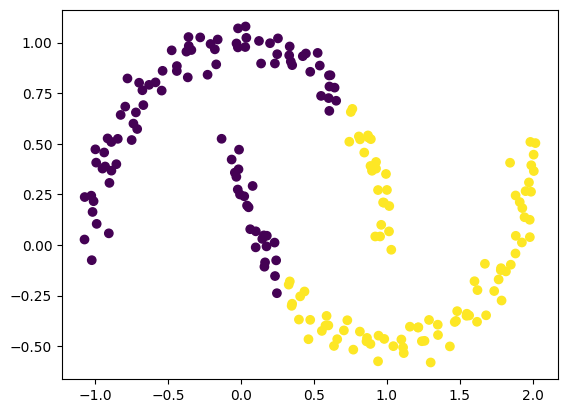

In [12]:
model=KMeans(2)
model.fit(X)
plt.scatter(X[:,0], X[:,1], c=model.labels_);

The clustering does not perform well in this case, as it is not possible to separate the two clusters with a single line. One solution is to embed the dataset into a higher-dimensional space, where separation becomes possible, and then apply K-Means clustering.

Alternatively, we can use a different clustering algorithm, such as DBSCAN. DBSCAN is density-based and works well on data where the density within clusters is uniform, allowing it to identify clusters of arbitrary shapes.

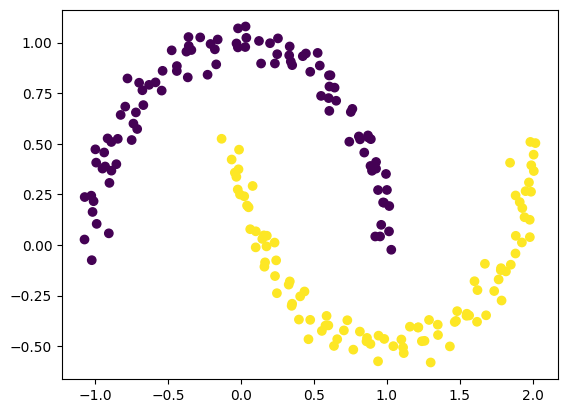

In [13]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=0.3)
model.fit(X)
plt.scatter(X[:,0], X[:,1], c=model.labels_);

The good news is that DBSCAN does not require the user to specify the number of clusters. But now the algorithm depends on another hyperparameter: a threshold for distance (here 0.3).

#Clustering digits

Using scikit-learn we can download a set of 1797 images of handwritten digits with the correct labels 0,1,...,9. The images have quite a low resolution: 8*8=64 pixels. Let's see how our machine learning method works with this kind of data.



In [14]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

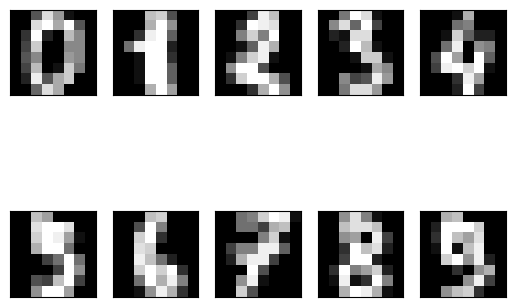

In [15]:
fig, axes = plt.subplots(2,5, subplot_kw=dict(xticks=[], yticks=[]))
for ax, digit in zip(axes.flat, digits.data[:10]):
    ax.imshow(digit.reshape(8,8), cmap="gray")

In [16]:
model=KMeans(n_clusters = 10, random_state=0)
model.fit(digits.data)
model.cluster_centers_.shape

(10, 64)

So, we have ten cluster centres, which are images with 8x8=64 pixels in them. We can have a look at their appearence:

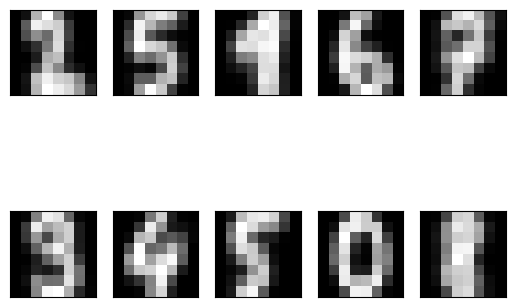

In [17]:
fig, axes = plt.subplots(2,5, subplot_kw=dict(xticks=[], yticks=[]))
for ax, digit in zip(axes.flat, model.cluster_centers_):
    ax.imshow(digit.reshape(8,8), cmap="gray")

One can recognize these numbers with the exception of maybe number eight. What is the accuracy score of this clustering?

In [18]:
permutation3 = find_permutation(10, digits.target, model.labels_)
print(permutation3)
acc = accuracy_score(digits.target, [ permutation3[label] for label in model.labels_])
print("Accuracy score is", acc)

[2, 5, 1, 6, 7, 3, 4, 5, 0, 8]
Accuracy score is 0.7440178074568725


#### <div class="alert alert-info">Exercise 5 (plant clustering)</div>

Using the same iris data set that you saw earlier in the classification, apply k-means clustering with 3 clusters.
Create a function `plant_clustering` that loads the iris data set, clusters the data and returns the accuracy_score.

<hr/>

#### <div class="alert alert-info">Exercise 6 (nonconvex clusters)</div>

This exercise can give four points at maximum!

Read the tab separated file data.tsv from the `src` folder into a DataFrame. The dataset has two features X1 and X2, and the label y. Cluster the feature matrix using DBSCAN with different values for the eps parameter. Use values in `np.arange(0.05, 0.2, 0.05)` for clustering. For each clustering, collect the accuracy score, the number of clusters, and the number of outliers. Return these values in a DataFrame, where columns and column names are as in the below example.

Note that DBSCAN uses label -1 to denote outliers , that is, those data points that didn't fit well in any cluster. You have to modify the find_permutation function to handle this: ignore the outlier data points from the accuracy score computation. In addition, if the number of clusters is not the same as the number of labels in the original data, set the accuracy score to NaN.

         eps   Score  Clusters  Outliers                             
    0    0.05      ?         ?         ?
    1    0.10      ?         ?         ?
    2    0.15      ?         ?         ?
    3    0.20      ?         ?         ?

Before submitting the solution, you can plot the data set (with clusters colored) to see what kind of data we are dealing with.

Points are given for each correct column in the result DataFrame.
<hr/>

['setosa' 'versicolor' 'virginica']


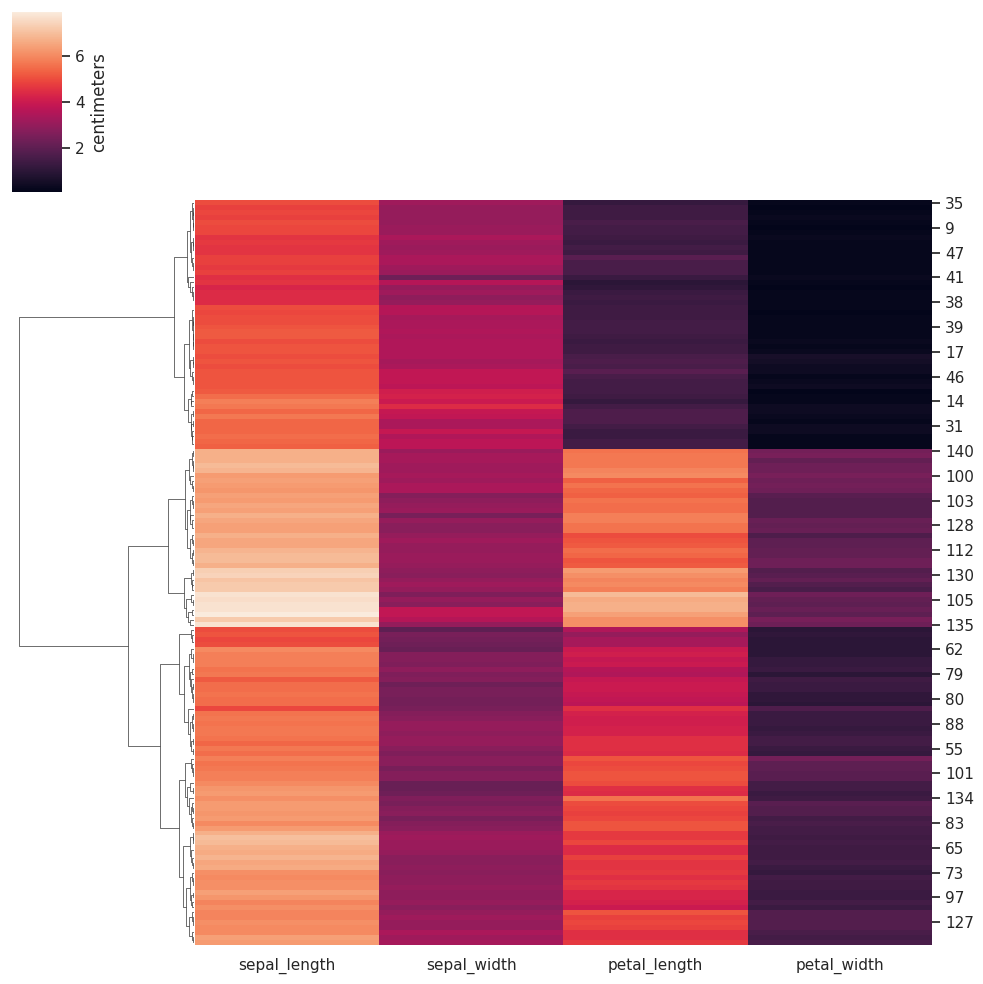

In [19]:
import seaborn as sns; sns.set(color_codes=True)
iris = sns.load_dataset("iris")
species = iris.pop("species")   # Remove the species column
print(species.unique())         # The samples seems to be from these three species
sns.clustermap(iris, method="ward", col_cluster=False, cbar_kws={'label': 'centimeters'}); # Cluster only the rows
#plt.colorbar().ax.set_title('This is a title')
#plt.gca().images[-1].colorbar.ax.set_title("title")